
  # MATH 472 Homework 10

  Holly Bossart

  Due 04-23-2020

In [1]:
## import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import logit, expit


 <br/>
 <br/>

 ## Problem 2: Problem 7.1 on page 230 of _Computational Statistics_

 ---

 ### Problem 7.1 Metropolis-Hastings

 The goal of this problem is to investigate the role of the proposal
 distribution in a Metropolis-Hastings algorithm designed to simulate from the
 posterior distribution of a parameter $\delta$. In part (a), you are asked to
 simulate data from a distribution with $\delta$ known. For parts (b)-(d),
 provide an appropriate plot and a table summarizing the output of the
 algorithm. To facilitate comparisons, use the same number of iterations,
 random seed, starting values, and burn-in period for all implementations of
 the algorithm.

 * (a) Simulate 200 realizations from the mixture distribution in Equation
   (7.6) with $\delta = 0.7$. Draw a histogram of these data.

 > (Eq. 7.6):
 >
 > $\delta N(7, 0.5^2) + (1 - \delta) N(10, 0.5^2)$

 * (b) Implement an independence chain MCMC procedure to simulate from the
   posterior distribution of $\delta$, using your data from part (a)

 * (c) Implement a random walk chain with $\delta^* = \delta^{(t)} +
   \epsilon$ with $\epsilon \sim \mathrm{Unif}(-1, 1)$.

 * (d) Reparameterize the problem letting $U = \log \left[ \delta / (1 -
   \delta) \right]$ and $U^* = u^{(t)} + \epsilon$. Implement a random walk
   chain in $U$-space as in equation (7.8).

 > (Eq. 7.8):
 >
 > $\frac{f\left(\mathrm{logit}^{-1}\{u^*\}\right)\ | J(u^*) |\ g \left(u^{(t)} | u^*\right)}
   {f\left(\mathrm{logit}^{-1}\{u^{(t)}\}\right)\ | J(u^{(t)}) |\ g \left(u^* | u^{(t)}\right)}$

 * (e) Compare the estimates and convergence behavior of the three algorithms.


**(a) solution:**

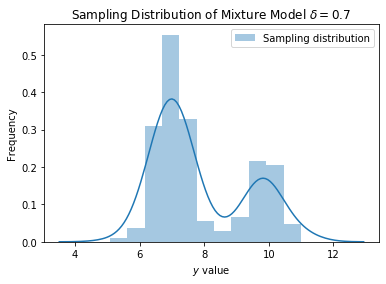

In [2]:
## problem 7.1 from the textbook
np.random.seed(50)

mu1 = 7
mu2 = 10
sig = 0.5
delta1 = 0.7          # known delta for this problem
n = 200
burn = 200

# part a
dist1 = np.random.normal(loc=mu1,
                         scale=sig,
                         size=int(n*delta1))
dist2 = np.random.normal(loc=mu2,
                         scale=sig,
                         size=int(n*(1-delta1)))
mix_vals = np.hstack((dist1, dist2))

# plotting for a
bns = np.linspace(4,11,14)
plt.figure()
sns.distplot(mix_vals,
             bins=bns,
             hist=True,
             kde=True,
             norm_hist= True,
             label = 'Sampling distribution') 
 
plt.xlabel('$y$ value')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Mixture Model $\delta = 0.7$')
plt.legend()

**(b) solution**

The sample mean of delta using Markov Chain Monte Carlo is 0.6963685470345258
The sample variance of delta using Markov Chain Monte Carlo is 0.001097425010612715
using 100000 iterations
and a burn-in period of 200


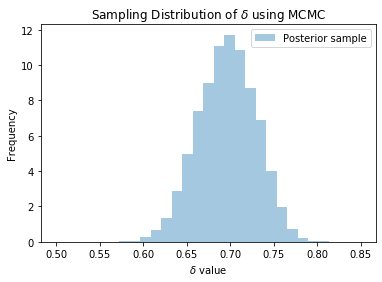

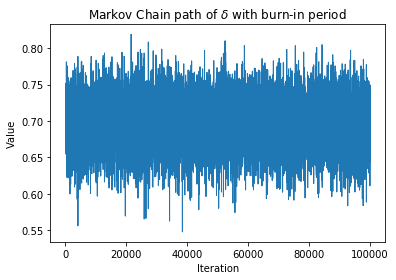

In [3]:
## part b
def mix_normal(vals, delta):
  return delta*stats.norm.pdf(vals, mu1, sig) + (1-delta)*stats.norm.pdf(vals, mu2, sig)

def likelihood(delta):
  return np.prod(mix_normal(mix_vals, delta))

m = 100000
deltas = np.zeros(m)          # this is where we will place our updated deltas
delta = delta_0 = 0.5         # some value between 0 and 1

for i in range(m):
    
    # grab from the prior/proposal
    delt_star = np.random.uniform(low=0, 
                                  high=1, 
                                  size=1)
    
    # compute Metropolis-Hastings ratio R
    R = likelihood(delt_star)/likelihood(delta)  # see ex 7.1 for justification
    
    # sample a value for X(t+1) 
    rand_val = np.random.uniform(low=0, 
                                 high=1,
                                 size=1)  # determines if we accept or reject (think of this as prob)
    
    if rand_val <= np.min((R, 1)):
        delta = delt_star 
    else:
        delta = delta
        
    deltas[i] = delta


# plotting for b
deltas = deltas[burn:]         # burn in period
plt.figure()
sns.distplot(deltas,
             bins=np.linspace(0.5, 0.85, 30),
             kde=False,
             norm_hist=True,
             label = 'Posterior sample') 
 
plt.xlabel('$\delta$ value')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of $\delta$ using MCMC')
plt.legend()     


# path plot
xax = np.arange(200, m)
plt.figure()
plt.plot(xax, deltas, linewidth=1)
plt.title('Markov Chain path of $\delta$ with burn-in period')
plt.xlabel('Iteration')
plt.ylabel('Value')

                         

b_mean = np.mean(deltas)
b_var = np.var(deltas)
print('The sample mean of delta using Markov Chain Monte Carlo is ' + str(b_mean))
print('The sample variance of delta using Markov Chain Monte Carlo is ' + str(b_var))
print('using ' + str(m) + ' iterations')
print('and a burn-in period of ' + str(burn))

**(c) solution**

The sample mean of delta using Markov Chain Monte Carlo with random walk is 0.6966329289007565
The sample variance of delta using Markov Chain Monte Carlo with random walk is 0.0010578016305257138
using 100000 iterations
and a burn-in period of 200


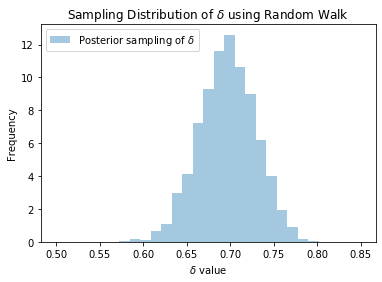

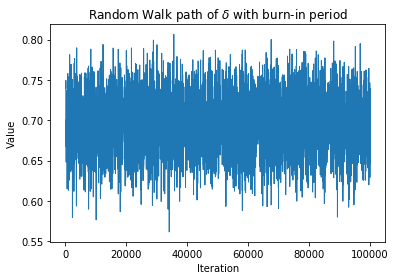

In [4]:
# part c (random walk chain)
m=100000
deltas = np.zeros(m)          # this is where we will place our updated deltas
delta = delta_0 = 0.5         # some value between 0 and 1

for i in range(m):
    
    # grab from the prior/proposal
    delt_star = delta + np.random.uniform(-1,1)
    
    # compute Metropolis-Hastings ratio R
    R = likelihood(delt_star)/likelihood(delta)
        
    # sample a value for X(t+1) 
    rand_val = np.random.uniform(0,1)
    
    if rand_val <= np.min((R,1)) and delt_star <= 1 and delt_star >= 0:
        delta = delt_star
    else:
        delta = delta
        
    deltas[i] = delta
    
    
deltas = deltas[burn:]
plt.figure()
sns.distplot(deltas,
             bins=np.linspace(0.5, 0.85, 30),
             norm_hist=True,
             kde=False,
             label = 'Posterior sampling of $\delta$') 

plt.xlabel('$\delta$ value')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of $\delta$ using Random Walk')
plt.legend()      

# path plot
plt.figure()
plt.plot(xax, deltas, linewidth=1)
plt.title('Random Walk path of $\delta$ with burn-in period')
plt.xlabel('Iteration')
plt.ylabel('Value')                           

c_mean = np.mean(deltas)
c_var = np.var(deltas)
print('The sample mean of delta using Markov Chain Monte Carlo with random walk is ' + str(c_mean))
print('The sample variance of delta using Markov Chain Monte Carlo with random walk is ' + str(c_var))
print('using ' + str(m) + ' iterations')
print('and a burn-in period of ' + str(burn))



**(d) solution**

The sample mean of delta using Markov Chain Monte Carlo with reparameterized random walk is 0.695687379512306
The sample variance of delta using Markov Chain Monte Carlo with reparameterized random walk is 0.0010578066230000037
using 100000 iterations
and a burn-in period of 200


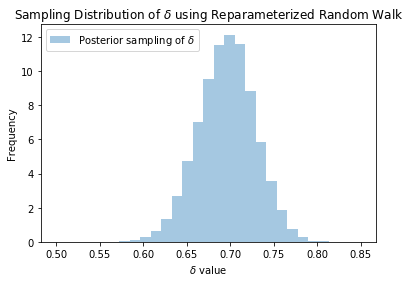

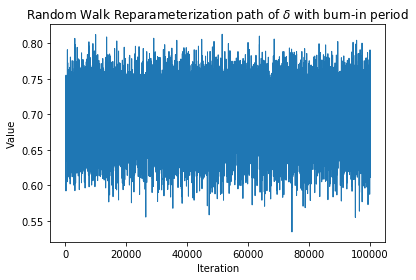

In [5]:
# part d (logit reparameterization)
m=100000
deltas = np.zeros(m)          # this is where we will place our updated deltas
delta = delta_0 = logit(0.5)  # some value between 0 and 1

def mix2(vals, delta):
    return (expit(delta)*stats.norm.pdf(vals, loc=mu1, scale=sig) + (1-expit(delta))*stats.norm.pdf(vals, loc=mu2, scale=sig))
    
def jacob(delta):
    return ((1/(np.exp(delta)+1)-1/(np.exp(delta)+1)**2))

def likelihood2(delta):
    return np.prod(mix2(mix_vals, delta)) 

for i in range(m):
    
    # grab from the prior/proposal
    delt_star = delta + np.random.uniform(-1,1)
    
    # compute Metropolis-Hastings ratio R
    R = (likelihood2(delt_star)*np.abs(jacob(delt_star)))/(likelihood2(delta)*np.abs(jacob(delta)))
        
    # sample a value for X(t+1) 
    rand_val = np.random.uniform(0,1)  # probability value
    
    if rand_val <= np.min((R,1)) and 0 <= expit(delt_star) <= 1:
        delta = delt_star
    else:
        delta = delta
        
    deltas[i] = expit(delta)

deltas = deltas[burn:]
plt.figure()
sns.distplot(deltas,
             bins=np.linspace(0.5, 0.85, 30),
             norm_hist=True,
             kde=False,
             label = 'Posterior sampling of $\delta$') 

plt.xlabel('$\delta$ value')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of $\delta$ using Reparameterized Random Walk')
plt.legend()      

# path plot
plt.figure()
plt.plot(xax, deltas, linewidth=1)
plt.title('Random Walk Reparameterization path of $\delta$ with burn-in period')
plt.xlabel('Iteration')
plt.ylabel('Value')                           

d_mean = np.mean(deltas)
d_var = np.var(deltas)
print('The sample mean of delta using Markov Chain Monte Carlo with reparameterized random walk is ' + str(d_mean))
print('The sample variance of delta using Markov Chain Monte Carlo with reparameterized random walk is ' + str(d_var))
print('using ' + str(m) + ' iterations')
print('and a burn-in period of ' + str(burn))  

**(e) solution:**
It is difficult to discern which estimate is the best, given that they all were relatively equal in terms of coming to the correct estimate (using the mean of the Markov-Chain, with the burn-in period of 200) and they all showed relatively small variances (around .001.) The method of parameterizations may be difficult if the Jacobian is difficult to compute, but it is more elegant than the random-walk chain in terms of how acceptance is generated. I could see how a random-walk chain may be a useful form of Metropolis Hastings, though it may be inefficient as it is adding a random increment to the past estimate of the parameter. It reminds me a little bit of gradient ascent algorithms. According to the book, reparametreizations can improve mixing and accelerate convergence, though it is model-specific, making it difficult to implement in a general sense.


 <br/>
 <br/>

 ## Problem 3: Problem 7.2 on page 231 of _Computational Statistics_

 ---

 ### Problem 7.2 - Simulating realizations

 Simulating from the mixture distribution in Equation (7.6) is straightforward
 [see part (a) of Problem 7.1]. However, using the Metropolis-Hastings
 algorithm to simulate realizations from this distribution is useful for
 exploring the role of the proposal distribution.

 * (a) Implement a Metropolis-hastings algorithm to simulate from Equation
   (7.6) with $\delta = 0.7$, using $N(x^{(t)}, 0.01^2)$ as the proposal
   distribution. For each of three starting values, $x^{(0)} = 0,\ 7,
   $ and $15$, run the chain for 10,000 iterations. Plot the sample path
   of the output from each chain. If only one of the sample paths was
   available, what would you conclude about the chain? For each of the
   simulations, creat a histogram of the realizations with the true density
   superimposed on the historam. Based on your output from all three chains,
   what can you say about the behavior of the chain?

 > (Eq. 7.6):
 >
 > $\delta N(7, 0.5^2) + (1 - \delta) N(10, 0.5^2)$

 * (b) Now change the proposal distribution to imporove the convergence
   properties of the chain. using the new proposal distribution, repeat part
   (a).